In [55]:
import numpy as np
import pandas as pd
import networkx as nx
import community as louvain_community
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [56]:
codes = pd.read_csv('data/codes.csv')
df = pd.read_csv('data/dij_joint_civ.csv')

In [57]:
codes.set_index('Code', inplace=True)

In [81]:
edge_list = []
for index, row in df.iterrows():
    edge_list.append((row['i'], row['j'], {'cost':0, 'weight':row['D_ij']}))
G = nx.Graph(edge_list)

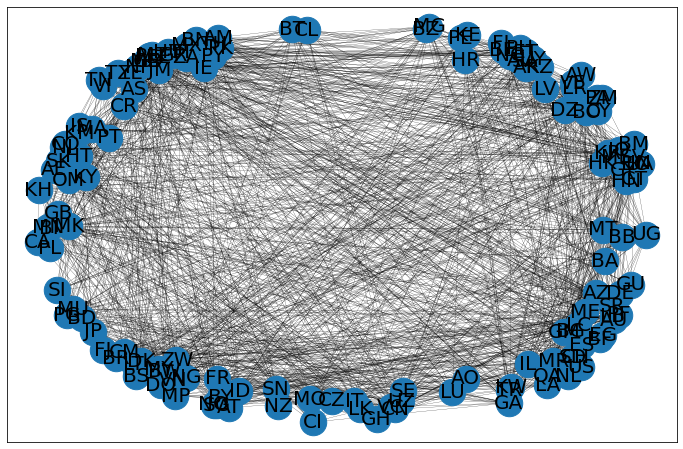

In [82]:
plt.figure(figsize=(12, 8))
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=.2)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

plt.show()

In [83]:
greater_than_0_edge_list = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 3]
G_greater_than_0 = nx.Graph(greater_than_0_edge_list)

In [84]:
partition = louvain_community.best_partition(G_greater_than_0)

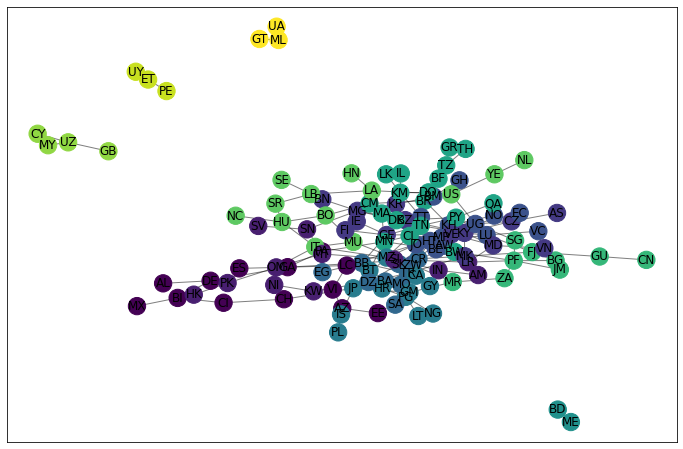

In [85]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_greater_than_0)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_greater_than_0, pos, partition.keys(), node_size=300,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_greater_than_0, pos, alpha=0.5)
nx.draw_networkx_labels(G_greater_than_0, pos, font_size=12)
plt.show()

In [86]:
groups = {num:[] for num in partition.values()}
for k, v in partition.items():
    groups[v].append(codes.loc[k]['Name'])

In [87]:
print(groups[0])

['Albania', 'Germany', 'Azerbaijan', 'Estonia', 'Virgin Islands, U.S.', 'Gabon', 'Burundi', "CÃ´te d'Ivoire", 'Mexico', 'Switzerland', 'Spain', 'Saint Lucia', 'Panama']


In [88]:
print(groups[1])

['Armenia', 'India', 'Liberia', 'Kuwait', 'Hong Kong', 'Pakistan', 'Oman', 'Nicaragua', 'Slovenia', 'Senegal', 'Malta', 'El Salvador']


In [89]:
print(groups[2])

['American Samoa', 'Czech Republic', 'Georgia', 'Korea, Republic of', 'Brunei Darussalam', 'Madagascar', 'Belize', 'Cayman Islands', 'Macedonia, the Former Yugoslav Republic of', 'Finland', 'Ireland', 'Venezuela, Bolivarian Republic of', 'Moldova, Republic of', 'Viet Nam']


In [90]:
print(groups[3])

['Aruba', 'Cambodia', 'Zimbabwe', 'Belgium', 'Haiti', 'Jordan', 'Bermuda', 'Ghana', 'Trinidad and Tobago', 'Northern Mariana Islands', 'Uganda', 'Ecuador', 'Luxembourg', 'Norway', 'Saint Vincent and the Grenadines']


In [91]:
print(groups[4])

['Bosnia and Herzegovina', 'Barbados', 'Turkey', 'Costa Rica', 'Egypt', 'Macao', 'Algeria', 'Slovakia', 'Saudi Arabia']


In [92]:
print(groups[5])

['Papua New Guinea', 'Bhutan', 'Croatia', 'Japan', 'Canada', 'Guyana', 'Mozambique', 'Gambia', 'Iceland', 'Poland', 'Lithuania', 'Nigeria']


In [93]:
print(groups[6])

['Bangladesh', 'Montenegro']


In [94]:
print(groups[7])

['Burkina Faso', 'Brazil', 'Tanzania, United Republic of', 'Cameroon', 'Mongolia', 'Botswana', 'Chile', 'Morocco', 'Denmark', 'Paraguay', 'Dominican Republic', 'Comoros', 'Tunisia', 'Greece', 'Israel', 'Sri Lanka', 'Qatar', 'Thailand']


In [95]:
print(groups[8])

['Bulgaria', 'Fiji', 'French Polynesia', 'China', 'Guam', 'Mauritania', 'Jamaica', 'South Africa', 'Singapore']


In [96]:
print(groups[9])

['Bolivia, Plurinational State of', 'Hungary', 'Lebanon', 'Mauritius', 'Honduras', "Lao People's Democratic Republic", 'Italy', 'New Caledonia', 'Suriname', 'United States', 'Sweden', 'Netherlands', 'Yemen']


In [97]:
# G = nx.karate_club_graph()

# # compute the best partition
# partition = louvain_community.best_partition(G)

# # draw the graph
# pos = nx.spring_layout(G)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
#                        cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.5)
# plt.show()

In [98]:
print(df[(df['j'] == 'ME') & (df['i'] == 'BD')])

       i   j      D_ij  civ_i civ_j civ_ij  comciv
1753  BD  ME  3.302314  islam   NaN    NaN       0


In [108]:
m = max([d['weight'] for (u, v, d) in G.edges(data=True) if d['weight'] > 0])

In [134]:
weight_edge_list = [(u, v, {'weight':d['weight']}) for (u, v, d) in G.edges(data=True) if d['weight'] > 0]

In [135]:
G_weighted_greater_than_0 = nx.Graph(weight_edge_list)
weight_partition = louvain_community.best_partition(G_weighted_greater_than_0)

In [136]:
print(weight_partition)

{'AE': 0, 'BY': 1, 'CA': 1, 'CH': 2, 'CZ': 3, 'DK': 4, 'JO': 5, 'KZ': 0, 'LK': 5, 'LU': 0, 'MN': 0, 'MO': 3, 'MR': 5, 'TN': 1, 'UZ': 0, 'AL': 2, 'AM': 1, 'BT': 0, 'DE': 2, 'GY': 1, 'HN': 4, 'IT': 6, 'MK': 1, 'PH': 0, 'SE': 5, 'AS': 3, 'BA': 1, 'CN': 2, 'EG': 3, 'FI': 4, 'GA': 2, 'GE': 4, 'HK': 3, 'HT': 5, 'IN': 1, 'JM': 3, 'LR': 1, 'LT': 4, 'ME': 7, 'NC': 6, 'PF': 3, 'SK': 5, 'SN': 4, 'SR': 6, 'TT': 5, 'UG': 3, 'UY': 2, 'ZA': 3, 'AO': 0, 'BO': 5, 'FJ': 2, 'GH': 0, 'KH': 7, 'KW': 6, 'NO': 7, 'SG': 3, 'AR': 7, 'AZ': 7, 'NG': 4, 'ZW': 5, 'ES': 2, 'GM': 1, 'LB': 5, 'LV': 5, 'MD': 1, 'MU': 5, 'PT': 1, 'SA': 3, 'SD': 3, 'SI': 1, 'TZ': 5, 'VI': 7, 'AT': 3, 'DZ': 3, 'ET': 2, 'KE': 2, 'KM': 5, 'KR': 4, 'LA': 4, 'AU': 5, 'BE': 5, 'BI': 2, 'VE': 4, 'AW': 7, 'BS': 1, 'MG': 4, 'US': 4, 'CR': 3, 'EE': 7, 'PE': 2, 'RU': 7, 'BB': 3, 'BN': 0, 'FR': 5, 'GR': 5, 'MZ': 1, 'PG': 4, 'PY': 4, 'TR': 1, 'UA': 2, 'KY': 1, 'ML': 2, 'NP': 3, 'BD': 7, 'DO': 5, 'GU': 2, 'PA': 2, 'QA': 4, 'SV': 4, 'TH': 5, 'BM': 0, 

In [137]:
groups = {num:[] for num in weight_partition.values()}
for k, v in weight_partition.items():
    groups[v].append(codes.loc[k]['Name'])

In [138]:
print(groups[0])

['United Arab Emirates', 'Kazakhstan', 'Luxembourg', 'Mongolia', 'Uzbekistan', 'Bhutan', 'Philippines', 'Angola', 'Ghana', 'Brunei Darussalam', 'Bermuda', 'Chile', 'Croatia', 'Botswana', 'Colombia', 'United Kingdom', 'Saint Vincent and the Grenadines', 'Cyprus']


In [139]:
print(groups[1], groups[2], groups[3], groups[4])

['Belarus', 'Canada', 'Tunisia', 'Armenia', 'Guyana', 'Macedonia, the Former Yugoslav Republic of', 'Bosnia and Herzegovina', 'India', 'Liberia', 'Gambia', 'Moldova, Republic of', 'Portugal', 'Slovenia', 'Bahamas', 'Mozambique', 'Turkey', 'Cayman Islands', 'Zambia', 'New Zealand', 'Japan', 'Iceland', 'Viet Nam', 'Poland'] ['Switzerland', 'Albania', 'Germany', 'China', 'Gabon', 'Uruguay', 'Fiji', 'Spain', 'Ethiopia', 'Kenya', 'Burundi', 'Peru', 'Ukraine', 'Mali', 'Guam', 'Panama', 'Indonesia', 'Bulgaria', "CÃ´te d'Ivoire", 'Mexico', 'Guatemala'] ['Czech Republic', 'Macao', 'American Samoa', 'Egypt', 'Hong Kong', 'Jamaica', 'French Polynesia', 'Uganda', 'South Africa', 'Singapore', 'Saudi Arabia', 'Sudan', 'Austria', 'Algeria', 'Costa Rica', 'Barbados', 'Nepal', 'Northern Mariana Islands', 'Ecuador'] ['Denmark', 'Honduras', 'Finland', 'Georgia', 'Lithuania', 'Senegal', 'Nigeria', 'Korea, Republic of', "Lao People's Democratic Republic", 'Venezuela, Bolivarian Republic of', 'Madagascar', 

In [116]:
pip install python-igraph

     |████████████████████████████████| 2.2 MB 1.5 MB/s eta 0:00:01
  Using cached texttable-1.6.3-py2.py3-none-any.whl (10 kB)
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [119]:
from igraph import Graph

In [118]:
Graph(nodes=)

TypeError: only numbers, strings or igraph.Vertex objects can be converted to vertex IDs

In [141]:
from networkx.algorithms.community import greedy_modularity_communities

In [145]:
x = greedy_modularity_communities(G_weighted_greater_than_0)

In [146]:
print(x) # that did not work...

[frozenset({'CA', 'CR', 'IE', 'US', 'PY', 'BA', 'HK', 'ME', 'GM', 'TN', 'BI', 'AT', 'NL', 'ES', 'SE', 'SI', 'NZ', 'UG', 'CI', 'JO', 'AM', 'CZ', 'MZ', 'MX', 'MD', 'HR', 'AS', 'AE', 'CM', 'MO', 'DZ', 'BE', 'YE', 'PK', 'BN', 'DK', 'LR', 'MG', 'NP', 'SD', 'GE', 'LT', 'BD', 'KM', 'PA', 'IN', 'GH', 'RU', 'KY', 'ID', 'CY', 'ZW', 'BO', 'JP', 'VC', 'AW', 'NI', 'BS', 'UA', 'GT', 'MN', 'LA', 'VN', 'OM', 'KZ', 'HU', 'SK', 'EE', 'TZ', 'FR', 'QA', 'MA', 'BZ', 'ZM', 'LB', 'MY', 'DO', 'NG', 'BM', 'ET', 'PT', 'BB', 'LU', 'ZA', 'KR', 'BF', 'BG', 'HT', 'SA', 'GA', 'IT', 'GR', 'JM', 'MR', 'UZ', 'NC', 'SG', 'HN', 'GU', 'AZ', 'LK', 'BW', 'NO', 'SN', 'CL', 'GY', 'CO', 'IS', 'AR', 'CH', 'SV', 'KE', 'ML', 'BY', 'EG', 'TT', 'VI', 'AO', 'TH', 'MT', 'PG', 'FJ', 'MK', 'DE', 'PH', 'KH', 'EC', 'AU', 'TR', 'PE', 'VE', 'BR', 'PF', 'SR', 'KW', 'LV', 'IL', 'GB', 'LC', 'PL', 'AL', 'CN', 'FI', 'UY', 'MU', 'BT', 'MP'})]


In [151]:
g = Graph.from_networkx(G_weighted_greater_than_0)

In [155]:
a = g.community_fastgreedy()
b = g.community_leading_eigenvector() # worked 4
c = g.community_leiden()
d = g.community_spinglass() # worked

In [185]:
#print(a, b, c, d, sep='\n')

In [186]:
gb0 = b.subgraphs()[0]
gb1 = b.subgraphs()[1]
gb2 = b.subgraphs()[2]

In [187]:
G1 = nx.from_edgelist([(names[x[0]], names[x[1]])
                      for names in [gb1.vs['_nx_name']] # simply a let
                      for x in gb1.get_edgelist()], nx.DiGraph())
G0 = nx.from_edgelist([(names[x[0]], names[x[1]])
                      for names in [gb0.vs['_nx_name']] # simply a let
                      for x in gb0.get_edgelist()], nx.DiGraph())
G2 = nx.from_edgelist([(names[x[0]], names[x[1]])
                      for names in [gb2.vs['_nx_name']] # simply a let
                      for x in gb2.get_edgelist()], nx.DiGraph())

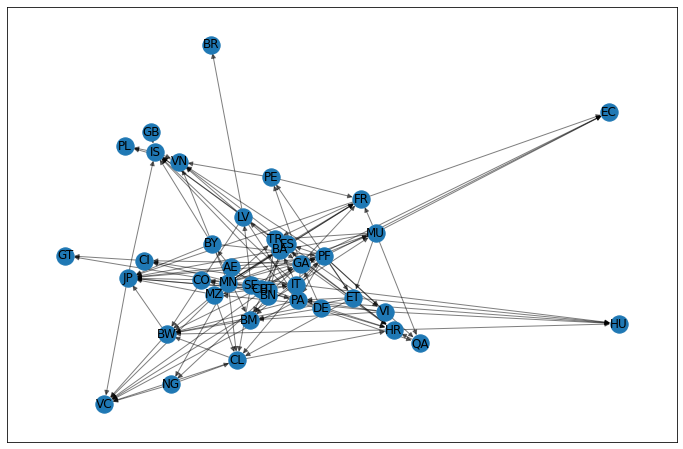

In [188]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G0)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G0, pos, node_size=300,
                       cmap=cmap)
nx.draw_networkx_edges(G0, pos, alpha=0.5)
nx.draw_networkx_labels(G0, pos, font_size=12)
plt.show()

In [189]:
gb0_nodes = []
for k, v in G0.edges():
    gb0_nodes.append(codes.loc[k]['Name'])
print(set(gb0_nodes))

{'Mauritius', 'Viet Nam', 'Nigeria', 'Brunei Darussalam', 'Colombia', 'Spain', 'Italy', 'Botswana', 'Latvia', 'Mongolia', 'Peru', 'France', 'Croatia', 'Virgin Islands, U.S.', 'Mozambique', 'Qatar', 'Chile', 'Bermuda', 'Switzerland', 'Sweden', 'United Arab Emirates', 'United Kingdom', 'French Polynesia', 'Bosnia and Herzegovina', 'Ethiopia', 'Gabon', 'Belarus', 'Turkey', 'Iceland', 'Bhutan', 'Germany', "CÃ´te d'Ivoire", 'Japan', 'Panama'}


In [190]:
gb1_nodes = []
for k, v in G1.edges():
    gb1_nodes.append(codes.loc[k]['Name'])
print(set(gb1_nodes))

{'Austria', 'Barbados', 'Aruba', 'Uruguay', 'Morocco', 'Czech Republic', 'Argentina', 'Uganda', 'Cayman Islands', 'Macedonia, the Former Yugoslav Republic of', 'Georgia', 'Mali', 'China', 'Guyana', 'Ukraine', 'Costa Rica', 'Gambia', 'Liberia', 'United States', 'Kazakhstan', 'Azerbaijan', 'Haiti', 'Philippines', 'Slovakia', 'Montenegro', 'Kenya', 'Egypt', 'Belize', 'Honduras', 'Albania', 'Burundi', 'Hong Kong', 'Armenia'}


In [191]:
gb2_nodes = []
for k, v in G2.edges():
    gb2_nodes.append(codes.loc[k]['Name'])
print(set(gb2_nodes))

{'Estonia', 'Thailand', 'Trinidad and Tobago', 'Norway', 'Luxembourg', 'Ghana', 'Tunisia', 'Jordan', 'Saint Lucia', 'Tanzania, United Republic of', 'Comoros', 'Yemen', 'Jamaica', 'Greece', 'Israel', 'Zimbabwe', 'Angola', 'Canada', 'Bolivia, Plurinational State of', 'Indonesia', 'Cambodia', 'Paraguay', 'Guam', 'Bangladesh', 'Singapore', 'Dominican Republic', 'Fiji'}
